# Classroom exercise: energy calculation

## Diffusion model in 1D

Description: A one-dimensional diffusion model. (Could be a gas of particles, or a bunch of crowded people in a corridor, or animals in a valley habitat...)

- Agents are on a 1d axis
- Agents do not want to be where there are other agents
- This is represented as an 'energy': the higher the energy, the more unhappy the agents.

Implementation:

- Given a vector $n$ of positive integers, and of arbitrary length
- Compute the energy, $E(n) = \sum_i n_i(n_i - 1)$
- Later, we will have the likelyhood of an agent moving depend on the change in energy.

Text(0.5, 0, 'Position $i$')

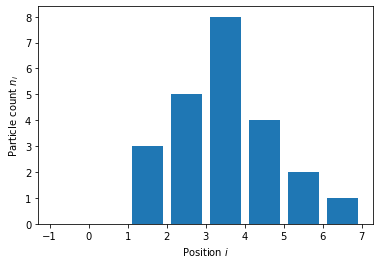

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

density = np.array([0, 0, 3, 5, 8, 4, 2, 1])
fig, ax = plt.subplots()
ax.bar(np.arange(len(density)) - 0.5, density)
ax.xrange = [-0.5, len(density) - 0.5]
ax.set_ylabel("Particle count $n_i$")
ax.set_xlabel("Position $i$")

Here, the total energy due to position 2 is $3 (3-1)=6$, and due to column 7 is $1 (1-1)=0$. We need to sum these to get the
total energy.

## Starting point

Create a Python module:

In [ ]:
%%bash
rm -rf diffusion
mkdir diffusion
install -m 644 /dev/null diffusion/__init__.py

**Windows:** You will need to run the following instead
    
```cmd
%%cmd
rmdir /s diffusion
mkdir diffusion
type nul > diffusion/__init__.py
```

**NB.** If you are using the Windows command prompt, you will also have to replace all subsequent `%%bash` directives with `%%cmd` 

In [1]:
%%cmd
rmdir /s diffusion
mkdir diffusion
type nul > diffusion/__init__.py

Microsoft Windows [Version 10.0.19042.1466]
(c) Microsoft Corporation. All rights reserved.

(rse_course_2022) C:\Users\dmassegur\Projects\P001 - RSE Course\Materials\rse-course\module05_testing_your_code>rmdir /s diffusion
diffusion, Are you sure (Y/N)? mkdir diffusion
diffusion, Are you sure (Y/N)? type nul > diffusion/__init__.py
diffusion, Are you sure (Y/N)? 

(rse_course_2022) C:\Users\dmassegur\Projects\P001 - RSE Course\Materials\rse-course\module05_testing_your_code>

* Implementation file: diffusion_model.py

In [3]:
import numpy as np

In [4]:
%%writefile diffusion/model.py
import numpy as np

def energy(density, coeff=1.0):
    """Energy associated with the diffusion model

    Parameters
    ----------

    density: array of positive integers
        Number of particles at each position i in the array
    coeff: float
        Diffusion coefficient.
    """
        
    a = np.zeros((0,0))
    print(density)
    nrg = density * (density - 1)
    nrg = sum(nrg)
    
    return nrg

Overwriting diffusion/model.py


In [ ]:
%%cmd
dir
dir diffusion

In [5]:
from diffusion.model import energy
import numpy as np

print(density)
print(type(density))
en = energy(density)

[0 0 3 5 8 4 2 1]
<class 'numpy.ndarray'>
[0 0 3 5 8 4 2 1]


* Testing file: test_diffusion_model.py

In [ ]:
%%writefile diffusion/test_model.py
from .model import energy


def test_energy():
    """Optional description for nose reporting."""
    # Test something
    assert density.all()

Invoke the tests:

In [ ]:
%%bash
cd diffusion
py.test

In [ ]:
%%cmd
cd diffusion
py.test

Now, write your code (in `model.py`), and tests (in `test_model.py`), testing as you do.

## Solution

Don't look until after you've tried!

In the spirit of test-driven development let's first consider our tests.

In [ ]:
%%writefile diffusion/test_model.py
"""Unit tests for a diffusion model."""

from pytest import raises
from .model import energy


def test_energy_fails_on_non_integer_density():
    with raises(TypeError) as exception:
        energy([1.0, 2, 3])


def test_energy_fails_on_negative_density():
    with raises(ValueError) as exception:
        energy([-1, 2, 3])


def test_energy_fails_ndimensional_density():
    with raises(ValueError) as exception:
        energy([[1, 2, 3], [3, 4, 5]])


def test_zero_energy_cases():
    # Zero energy at zero density
    densities = [[], [0], [0, 0, 0]]
    for density in densities:
        assert energy(density) == 0


def test_derivative():
    from numpy.random import randint

    # Loop over vectors of different sizes (but not empty)
    for vector_size in randint(1, 1000, size=30):

        # Create random density of size N
        density = randint(50, size=vector_size)

        # will do derivative at this index
        element_index = randint(vector_size)

        # modified densities
        density_plus_one = density.copy()
        density_plus_one[element_index] += 1

        # Compute and check result
        # d(n^2-1)/dn = 2n
        expected = 2.0 * density[element_index] if density[element_index] > 0 else 0
        actual = energy(density_plus_one) - energy(density)
        assert expected == actual


def test_derivative_no_self_energy():
    """If particle is alone, then its participation to energy is zero."""
    from numpy import array

    density = array([1, 0, 1, 10, 15, 0])
    density_plus_one = density.copy()
    density[1] += 1

    expected = 0
    actual = energy(density_plus_one) - energy(density)
    assert expected == actual

Now let's write an implementation that passes the tests.


In [ ]:
%%writefile diffusion/model.py
"""Simplistic 1-dimensional diffusion model."""
from numpy import array, any, sum


def energy(density):
    """Energy associated with the diffusion model
    :Parameters:
      density: array of positive integers
         Number of particles at each position i in the array/geometry
    """

    # Make sure input is an numpy array
    density = array(density)

    # ...of the right kind (integer). Unless it is zero length,
    #    in which case type does not matter.

    if density.dtype.kind != "i" and len(density) > 0:
        raise TypeError("Density should be a array of *integers*.")
    # and the right values (positive or null)
    if any(density < 0):
        raise ValueError("Density should be an array of *positive* integers.")
    if density.ndim != 1:
        raise ValueError(
            "Density should be an a *1-dimensional*" + "array of positive integers."
        )

    return sum(density * (density - 1))

In [ ]:
%%cmd
cd diffusion
py.test

## Coverage

With py.test, you can use the ["pytest-cov" plugin](https://github.com/pytest-dev/pytest-cov) to measure test coverage

In [ ]:
!pip install pytest-cov

In [ ]:
%%cmd
cd diffusion
py.test --cov

Or an html report:

In [ ]:
%%cmd   #%%bash
#%%cmd (windows)
cd diffusion
py.test --cov --cov-report html

Look at the [coverage results](./diffusion/htmlcov/index.html)